In [531]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from time import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [555]:
df = pd.read_csv("sgemm_product.csv")
df["RunF"]= (df["Run1 (ms)"] + df["Run2 (ms)"]+ df["Run3 (ms)"]+df["Run4 (ms)"])/4
df=df.drop(columns=['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'])
df['RunF_binary'] = np.where(df['RunF']>=217.5, 1, 0)
train,test = train_test_split(df,test_size = 0.3, random_state=5000)
x_tr= train.iloc[:,0:14]
x_tr=(x_tr - x_tr.mean())/x_tr.std()
y_tr= train.iloc[:,-1]
x_ts= test.iloc[:,0:14]
x_ts=(x_ts-x_ts.mean())/x_ts.std()
y_ts= test.iloc[:,-1]

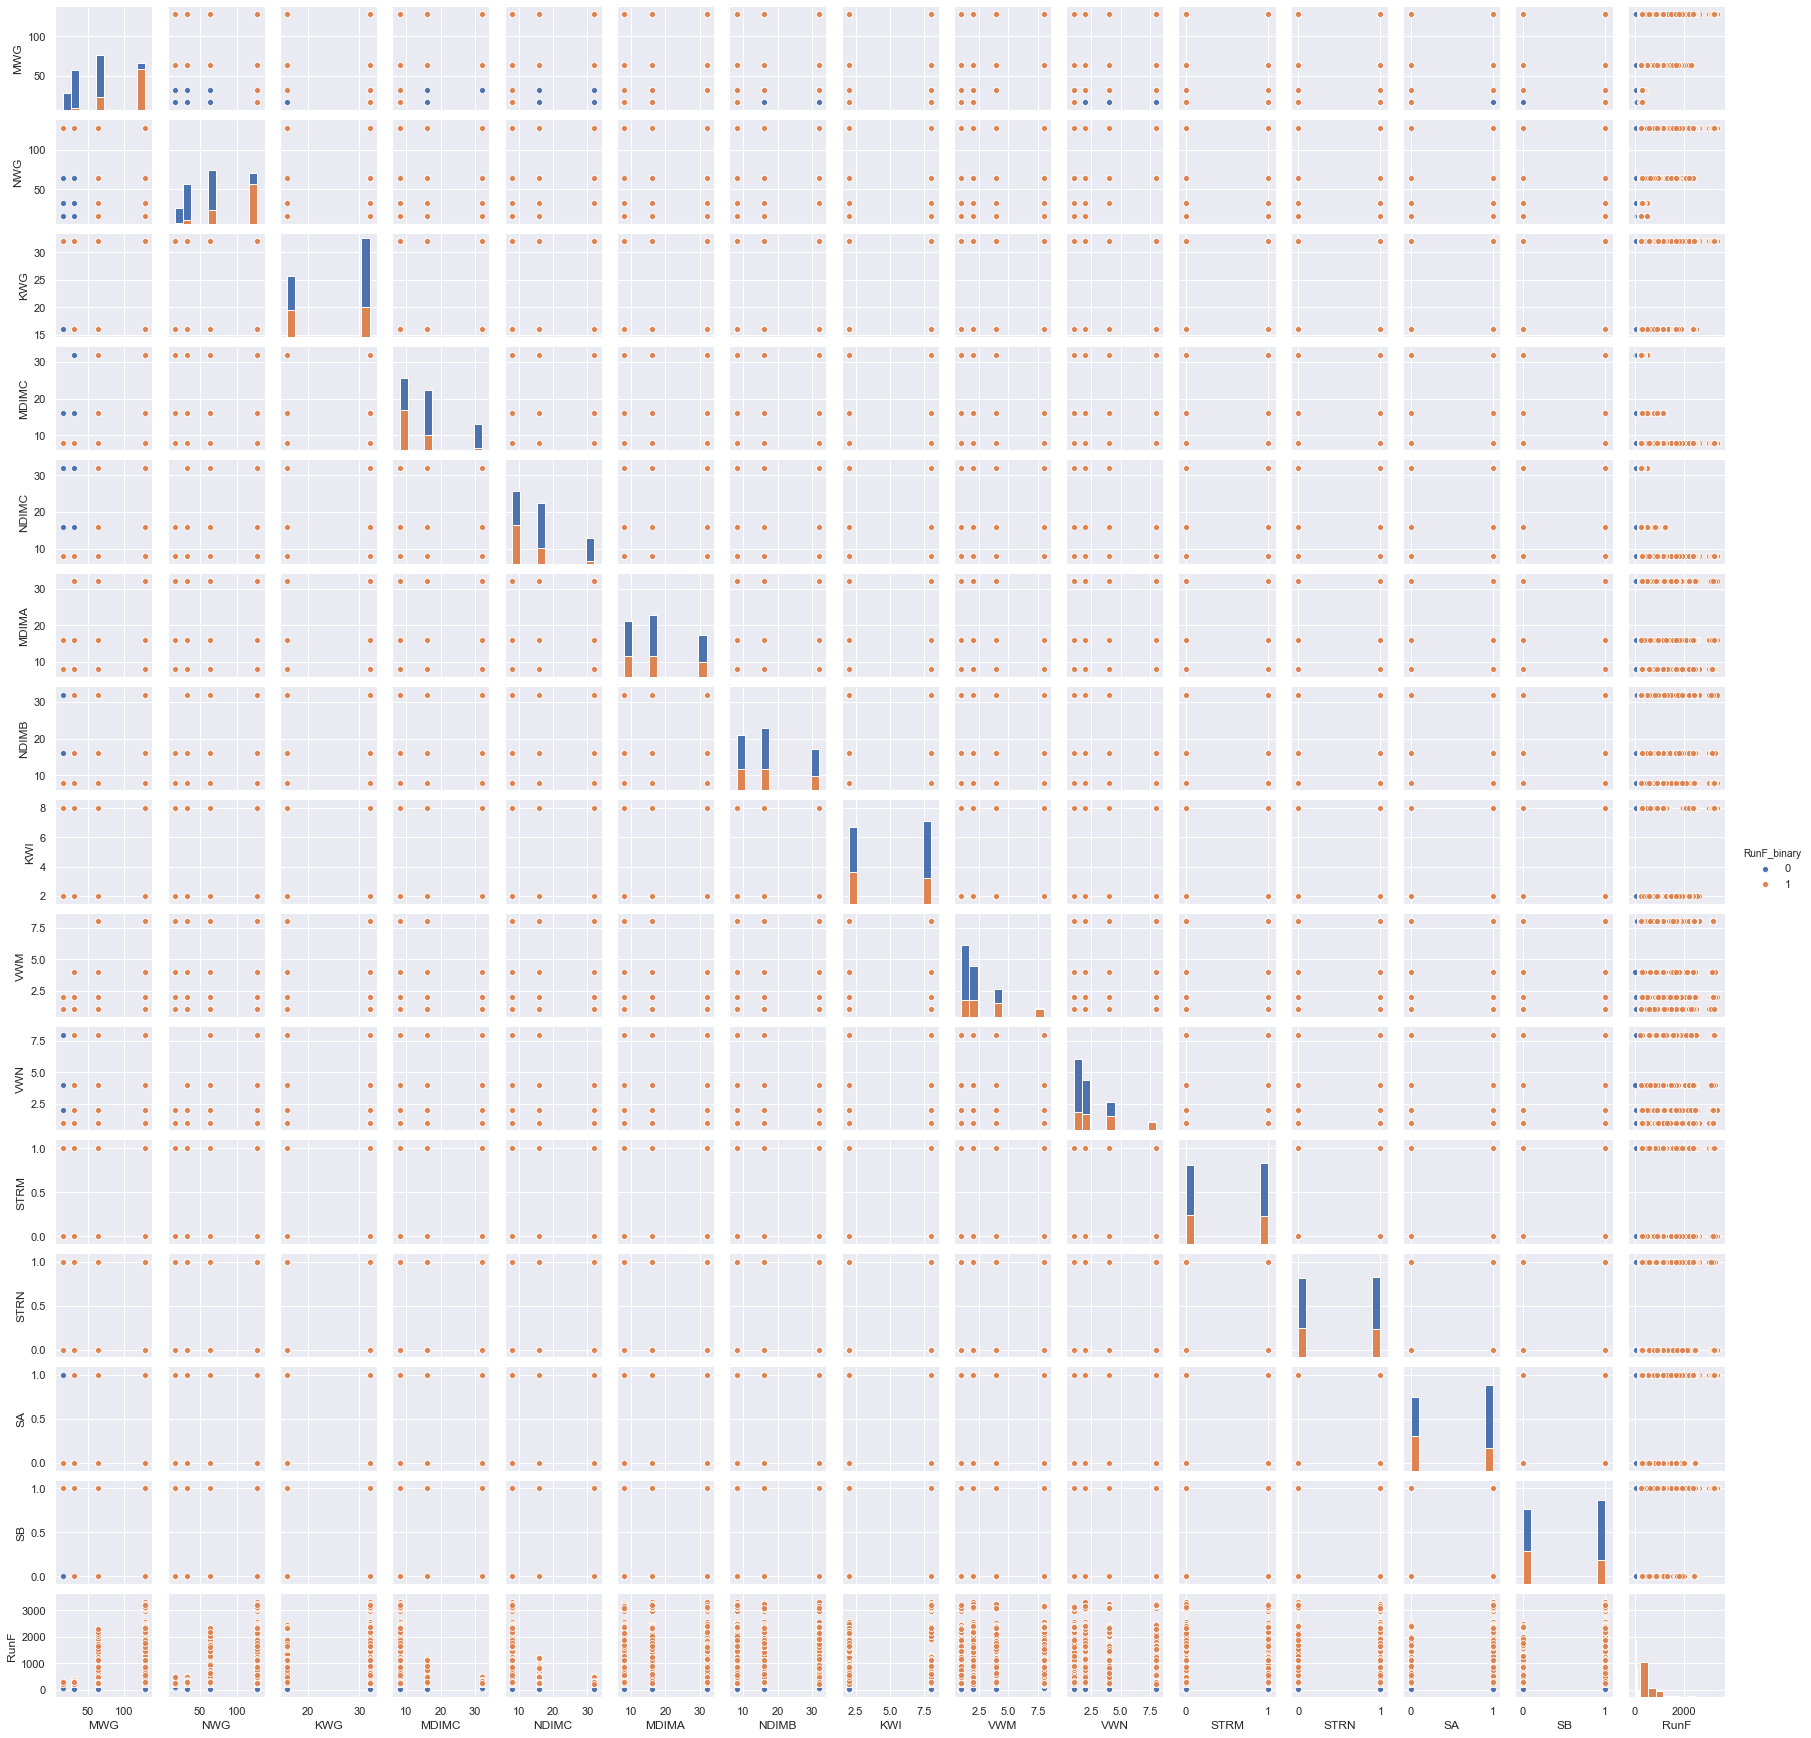

In [559]:
sns.pairplot(test, hue="RunF_binary", diag_kind="hist", size=1.6)

In [182]:
df2 = pd.read_csv("voice.csv")
df2['label'] = np.where(df2['label']=='male', 1, 0)
x2= df2.iloc[:,0:20]
xs2=(x2 - x2.mean())/x2.std()
y2= df2.iloc[:,-1]

C:\Users\Hashir\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


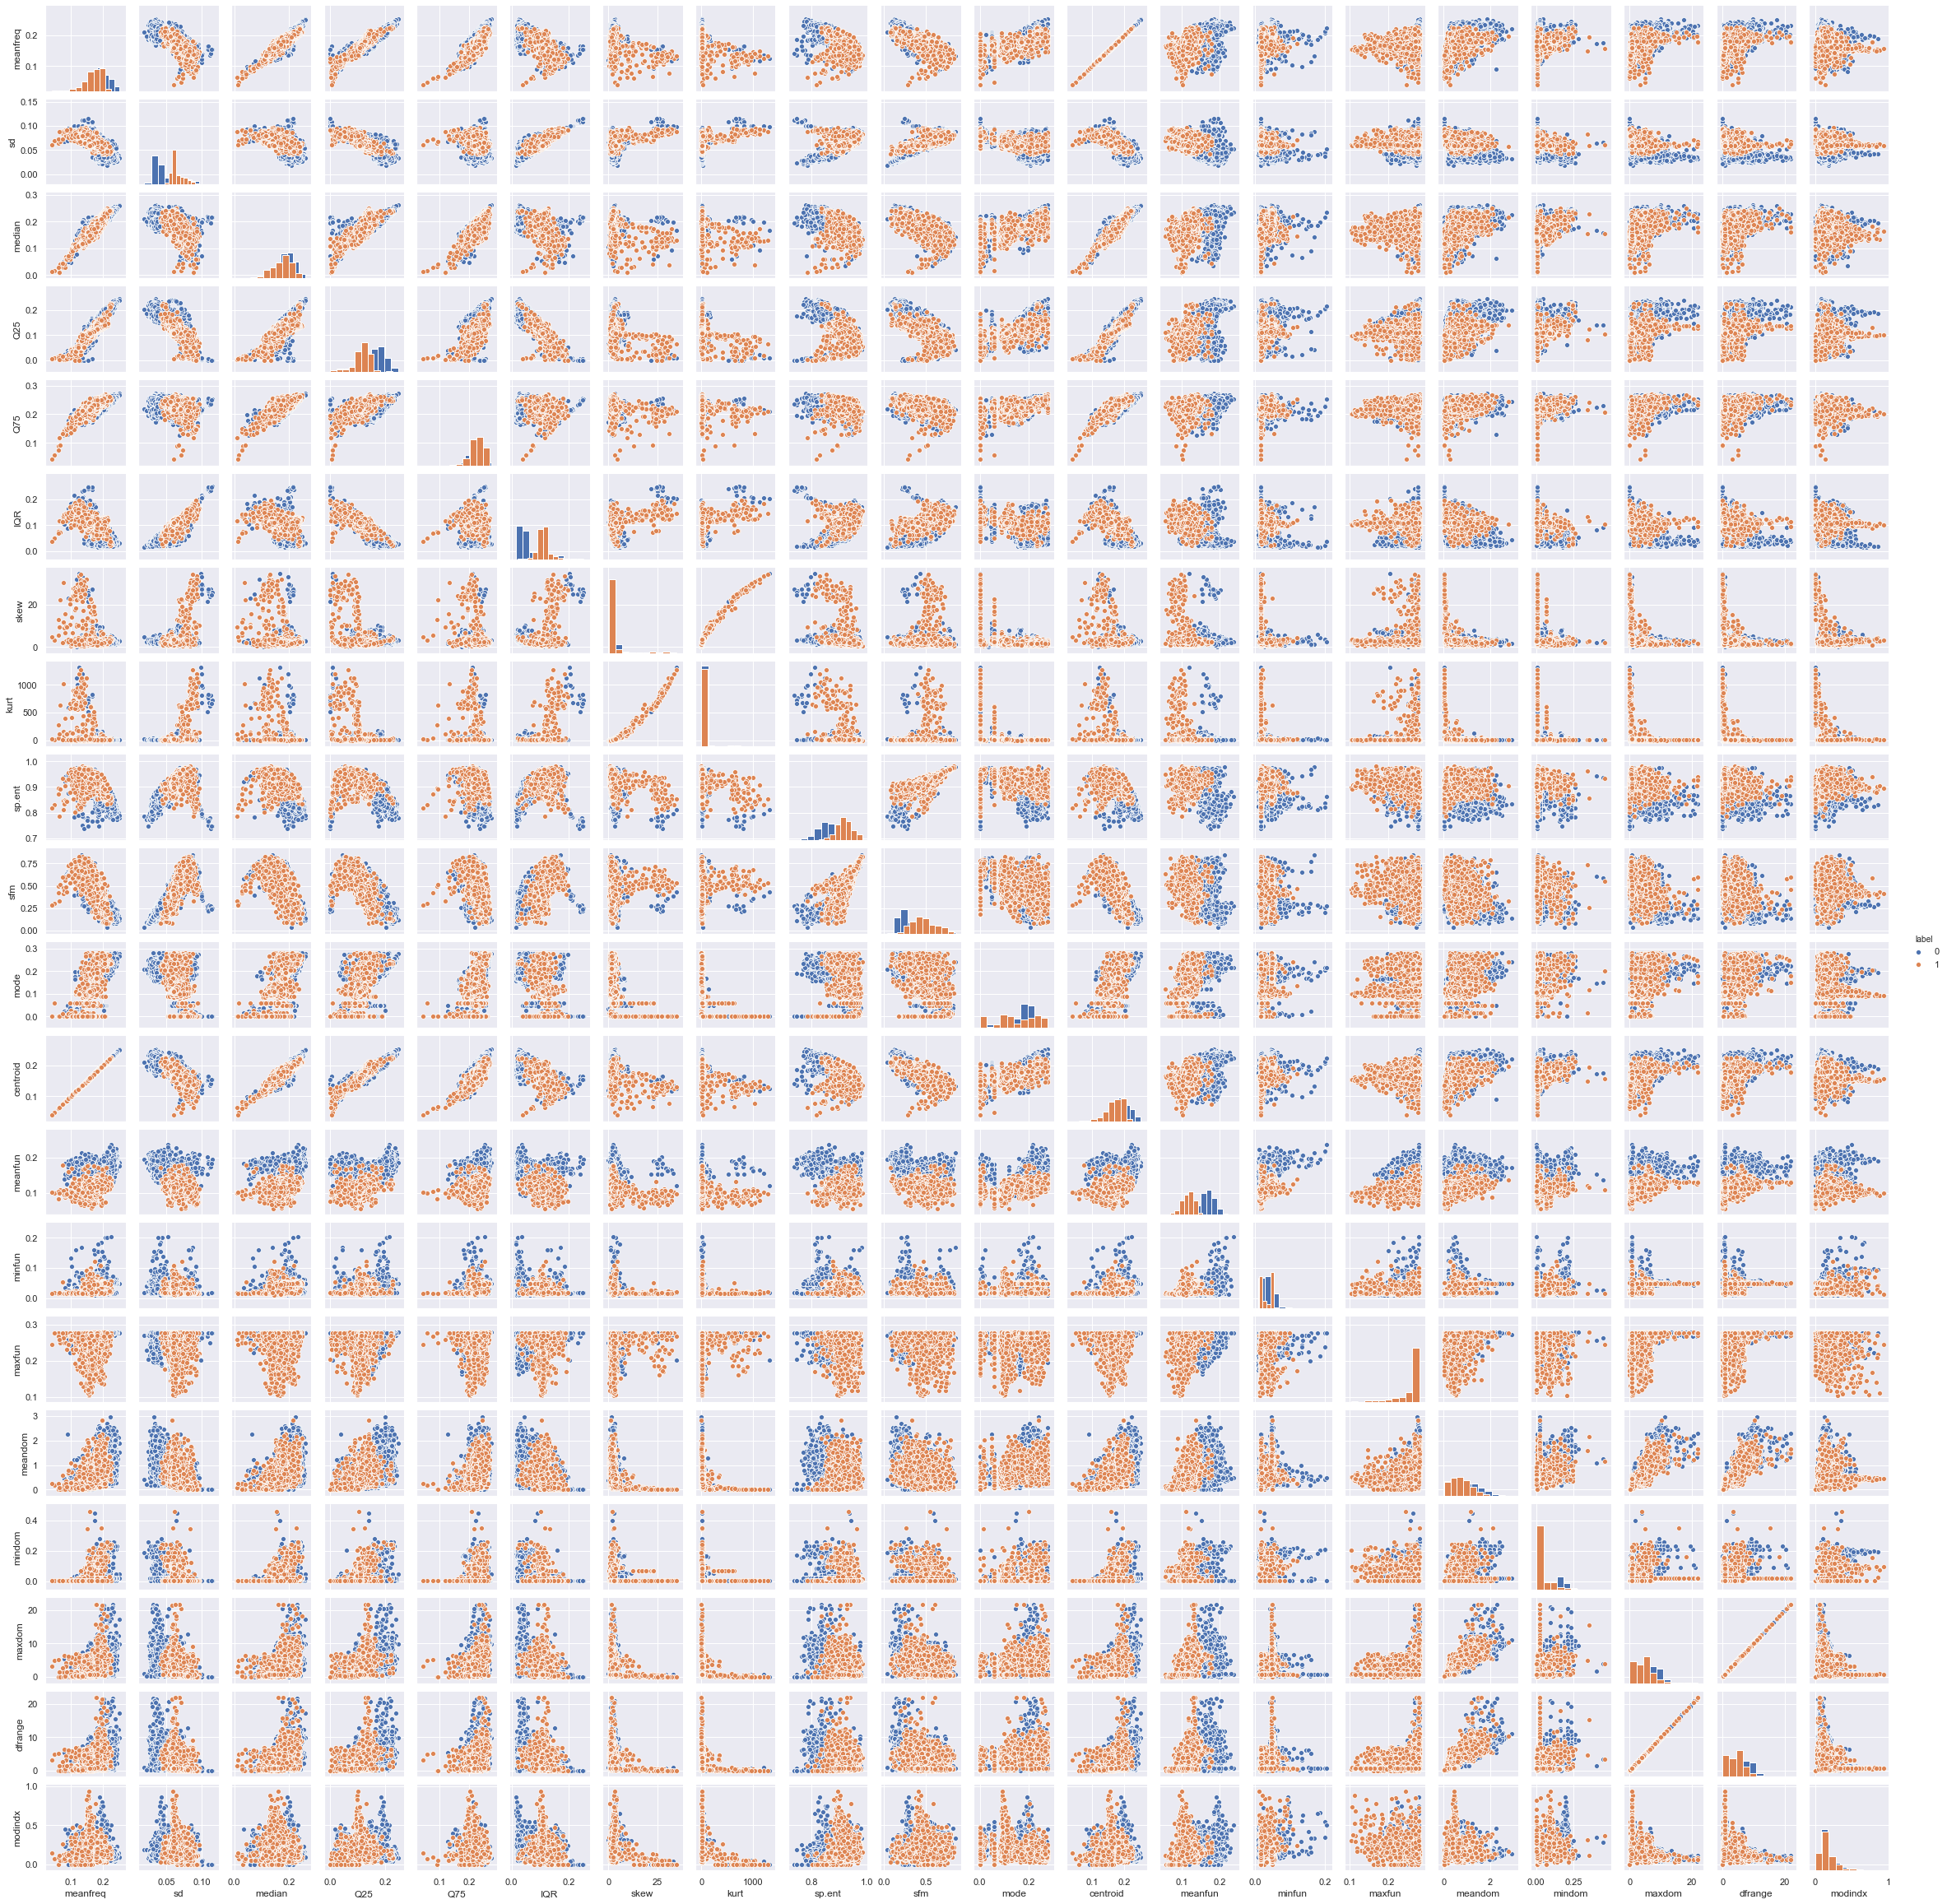

In [314]:
sns.pairplot(df2, hue="label", diag_kind="hist", size=1.6)

In [381]:
#gives time and within cluster sum of squares for different k kmeans
def kmwork(n,data):
    time_taken=[]
    wcss = []
    for k in range(1, n):
        t0= time()
        km2 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=1000)
        km2.fit(data)
        algo_time= round(time() - t0, 3)
        wcss.append(km2.inertia_)
        time_taken.append(algo_time)
    return time_taken, wcss

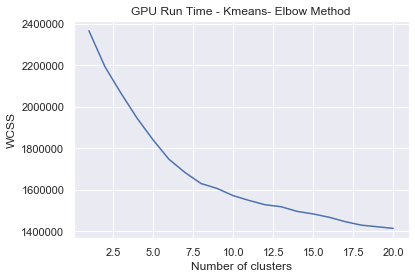

In [565]:
#wcss vs k GPU Run Time
timing,wcss_km=kmwork(21,x_tr)
plt.plot(range(1, 21), wcss_km)
plt.title('GPU Run Time - Kmeans- Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

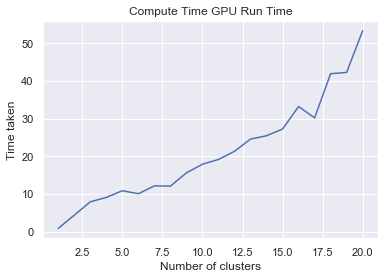

In [566]:
#time taken for GPU Run Time Clustering in kmeans?
plt.plot(range(1, 21), timing)
plt.title('Compute Time GPU Run Time')
plt.xlabel('Number of clusters')
plt.ylabel('Time taken')
plt.show()

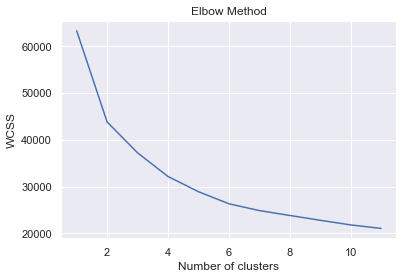

In [317]:
#wcss vs k voice
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

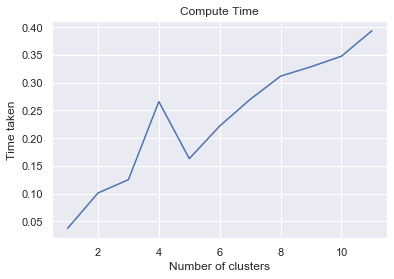

In [320]:
#time taken for voice in kmeans?
plt.plot(range(1, 12), time_taken)
plt.title('Compute Time')
plt.xlabel('Number of clusters')
plt.ylabel('Time taken')
plt.show()

In [567]:
#GPU Clusters
km = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=1000)
pred_y = km.fit_predict(x_tr)

In [326]:
#voice clusters
km2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1000)
pred_y2 = km2.fit_predict(xs2)


In [568]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'RunF', 'RunF_binary'],
      dtype='object')

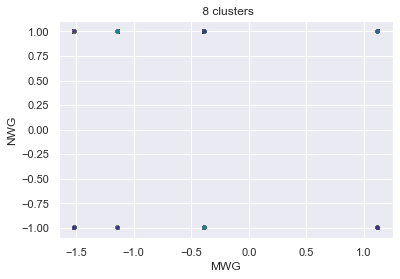

In [576]:
#GPU 8 clusters
plt.title(' 8 clusters')
plt.xlabel('MWG')
plt.ylabel('NWG')
plt.scatter(x_tr.iloc[:,0], x_tr.iloc[:,10], c=pred_y, s=10, cmap='viridis')
plt.show()

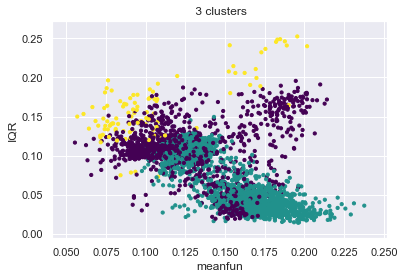

In [327]:
#voice recognition 3 clusters 
plt.title(' 3 clusters')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.scatter(x2.iloc[:,12], x2.iloc[:,5], c=pred_y2, s=10, cmap='viridis')
plt.show()

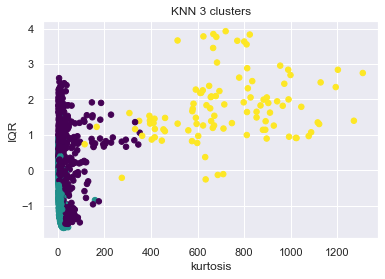

In [328]:
plt.title('KNN 3 clusters')
plt.xlabel('kurtosis')
plt.ylabel('IQR')
plt.scatter(x2.iloc[:,7], xs2.iloc[:,5], c=pred_y2, s=30, cmap='viridis')
plt.show()

In [329]:
km2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=1000)
pred_y2 = km2.fit_predict(xs2)

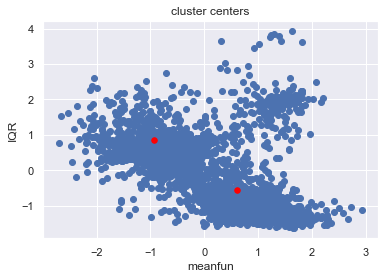

In [330]:
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,5])
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], s=30, c='red')
plt.title('cluster centers')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.show()
plt.show()

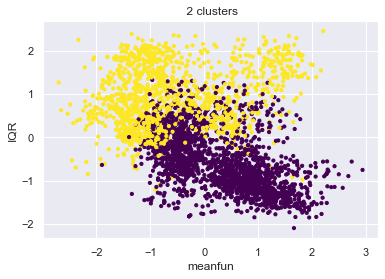

In [332]:
plt.title(' 2 clusters')
plt.xlabel('meanfun')
plt.ylabel('sfm')
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,9], c=pred_y2, s=10, cmap='viridis')
plt.show()

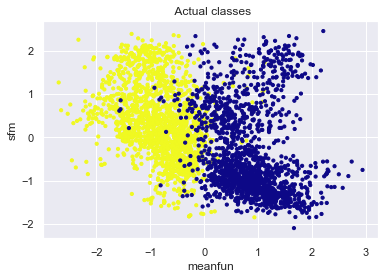

In [334]:
plt.title(' Actual classes')
plt.xlabel('meanfun')
plt.ylabel('sfm')
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,9], c=y2, s=10, cmap='plasma')
plt.show()

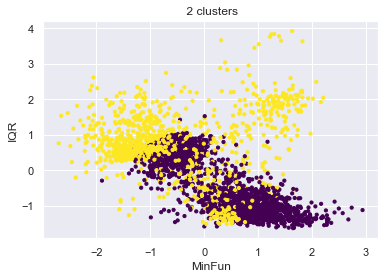

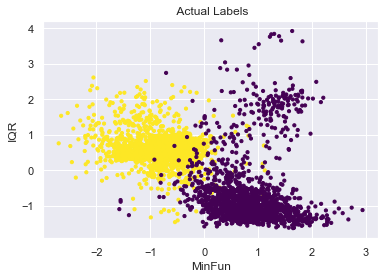

In [607]:
plt.title(' 2 clusters')
plt.xlabel('MinFun')
plt.ylabel('IQR')
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,5], c=pred_y2, s=10, cmap='viridis')
plt.show()
plt.title(' Actual Labels')
plt.xlabel('MinFun')
plt.ylabel('IQR')
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,5], c=y2, s=10, cmap='viridis')
plt.show()

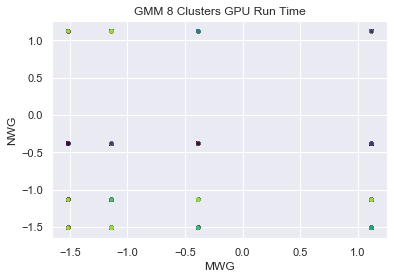

In [577]:
#GPU clusters
gmm = GMM(n_components=8, covariance_type='diag').fit(x_tr)
gmm_y= gmm.predict(x_tr)
plt.title('GMM 8 Clusters GPU Run Time')
plt.xlabel('MWG')
plt.ylabel('NWG')
plt.scatter(x_tr.iloc[:,0], x_tr.iloc[:,1], c=gmm_y, s=10, cmap='viridis')
plt.show()

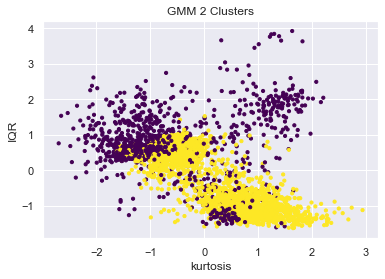

In [348]:
gmm2 = GMM(n_components=2, covariance_type='diag').fit(xs2)
gmm_y2 = gmm2.predict(xs2)
plt.title('GMM 2 Clusters')
plt.xlabel('kurtosis')
plt.ylabel('IQR')
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,5], c=gmm_y2, s=10, cmap='viridis')

In [580]:
probs = gmm.predict_proba(x_tr)
for i in probs[0:5]: print(i)

[0.00000000e+00 0.00000000e+00 9.99991937e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.06343269e-06 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99913097e-01
 0.00000000e+00 0.00000000e+00 8.69029800e-05 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99947546e-01
 0.00000000e+00 0.00000000e+00 5.24542027e-05 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.37033051e-05 9.99986297e-01]
[1.83586491e-10 0.00000000e+00 2.10451501e-05 0.00000000e+00
 0.00000000e+00 9.99978955e-01 0.00000000e+00 0.00000000e+00]


In [308]:
probs2 = gmm2.predict_proba(xs2)
#np.count_nonzero(probs2==1)
np.count_nonzero(probs2==0)

0

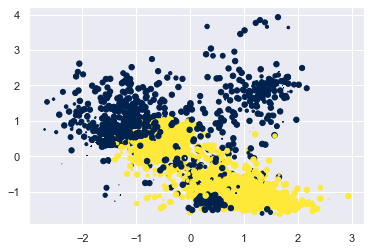

In [350]:
size = 30 * probs2.max(1) ** 400  # square emphasizes differences
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,5], c=gmm_y2, cmap='cividis', s=size)

In [493]:
for i in probs2[0:5]: print(i)

[0.23848816 0.76151184]
[0.00297789 0.99702211]
[0.00112114 0.99887886]
[5.49180560e-05 9.99945082e-01]
[2.59915619e-05 9.99974008e-01]


In [581]:
#how good is gmm for GPU?
score_gmm = metrics.silhouette_score(x_tr, gmm_y)
score_gmm

0.09231852986862403

In [582]:
#how good was km for GPU
score_km = metrics.silhouette_score(x_tr, pred_y)
score_km

0.09240154231544685

In [356]:
#how good is gmm for voice?
score_gmm2 = metrics.silhouette_score(xs2, gmm_y2)
score_gmm2

0.2998028791036689

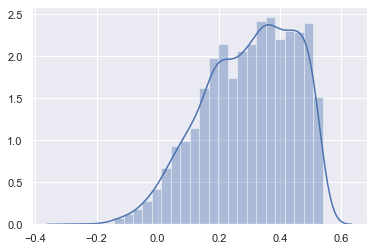

In [353]:
#score dist of gmm
scores = metrics.silhouette_samples(xs2, gmm_y2)
sns.distplot(scores)

In [358]:
#Silouette Score Voice Recognition GMM and Kmeans
score_km2 = metrics.silhouette_score(xs2, pred_y2)
print( 'gmm' , score_gmm2, 'kmeans' , score_km2) 

gmm 0.2998028791036689 kmeans 0.29189134268871036


In [361]:
# first let's see how the gmm clustering did - 
rscore_gmm2 = adjusted_rand_score(y2,gmm_y2)
rscore_gmm2

0.05850090993439531

In [362]:
# let's see how the k-means clustering did - 
rscore_km2 = adjusted_rand_score(y2,pred_y2)
rscore_km2

0.07137051271772643

In [363]:
#gmm vs km?
rscore_km2_gmm2 = adjusted_rand_score(gmm_y2,pred_y2)
rscore_km2_gmm2

0.7869191742043333

In [604]:
#Filtering GPU Data
columns=['MWG','NWG','NDIMC','MDIMC','SA','SB']
x_tr_fil=pd.DataFrame(x_tr,columns=columns)
x_ts_fil=pd.DataFrame(x_ts,columns=columns)
time_fil, wcss_fil= kmwork(51,x_tr_fil)

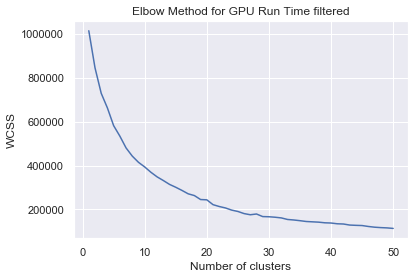

In [593]:
plt.plot(range(1, 51),wcss_fil)
plt.title('Elbow Method for GPU Run Time filtered')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [392]:
#filtering based on DT output
# IQR AND MEANFUN
columns = ['meanfun', 'IQR','sd']
xs2_fil = pd.DataFrame(xs2, columns=columns)

In [394]:
k_time_fil, k_wcss_fil= kmwork(11,xs2_fil)

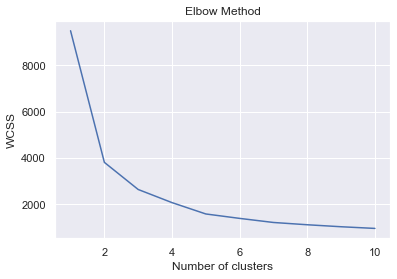

In [395]:
plt.plot(range(1, 11),k_wcss_fil)
plt.title('Elbow Method for Voice Recognition Filtered')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [595]:
km_fil = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=1000)
pred_y_fil=km_fil.fit_predict(x_tr_fil)

In [400]:
#try both 3 and 2 
km2_fil = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=1000)
pred_y2_fil = km2_fil.fit_predict(xs2_fil)

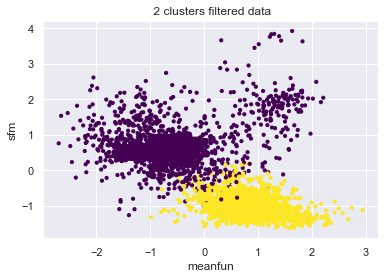

In [401]:
#try both 3 and 2 k 
plt.title(' 2 clusters filtered data')
plt.xlabel('meanfun')
plt.ylabel('sfm')
plt.scatter(xs2.iloc[:,12], xs2.iloc[:,5], c=pred_y2_fil, s=10, cmap='viridis')
plt.show()

In [598]:
#before and after filtering GPU
adjusted_rand_score(pred_y_fil,pred_y)

0.254221168572529

In [402]:
#filtered vs actual voice
print( 'Actual vs filtered:',adjusted_rand_score(pred_y2_fil,y2), 'Filtered vs KM:',adjusted_rand_score(pred_y2_fil,pred_y2))  

Actual vs filtered: 0.605800385190816 Filtered vs KM: 0.19443784430724437


In [420]:
#PCA
# Making an instance of the Model
pca = PCA(0.99)
pca.fit(xs2)
xs2_img = pca.transform(xs2)
pca.explained_variance_ratio_

array([0.45216391, 0.11870609, 0.10909939, 0.07619763, 0.05293938,
       0.04614966, 0.03204482, 0.02898394, 0.02451726, 0.01875518,
       0.01655906, 0.00895843, 0.00690292])

In [599]:
#PCA GPU
pca.fit(x_tr)
x_tr_img = pca.transform(x_tr)
pca.explained_variance_ratio_

array([0.1017094 , 0.09851069, 0.09559914, 0.09408263, 0.076955  ,
       0.07161881, 0.0715314 , 0.07147871, 0.07135712, 0.07114532])

In [601]:
#km on pca data gpu
km_pca = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=1000)
pred_pca_gpu = km_pca.fit_predict(x_tr_img)
adjusted_rand_score(pred_pca_gpu,pred_y)

0.3499322243981325

In [602]:
metrics.silhouette_score(x_tr, pred_pca_gpu)

0.08240130871774828

In [421]:
km2_pca = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=1000)
pred_pca = km2_pca.fit_predict(xs2_img)

In [424]:
print( 'Actual vs pca:',adjusted_rand_score(pred_pca,y2), 'pca vs KM:',adjusted_rand_score(pred_pca,pred_y2))  

Actual vs pca: 0.07137051271772643 pca vs KM: 1.0


In [454]:
km_pca_r=[]
actual_pca_r=[]
comps= range(1,11)
for i in comps:
    pca = PCA(i)
    pca.fit(xs2)
    xs2_img = pca.transform(xs2)
    variation=pca.explained_variance_ratio_
    km2_pca = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=1000)
    pred_pca = km2_pca.fit_predict(xs2_img)
    actual_pca_r.append(adjusted_rand_score(pred_pca,y2))
    km_pca_r.append(adjusted_rand_score(pred_pca,pred_y2))

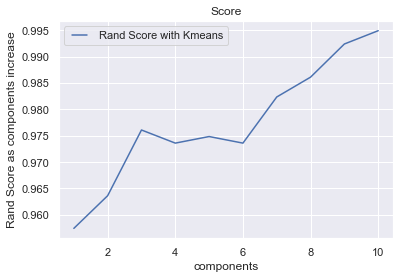

In [455]:
# See both line separately. Maybe even just 1 component is too many. 
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(comps, km_pca_r, 'b', label="Rand Score with Kmeans")
#line2, = plt.plot(comps, actual_pca_r, 'r', label="Rand Score with Actuals")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Rand Score as components increase")
plt.xlabel("components")
plt.title("Score")
plt.show()

In [494]:
#gmm with pca vs actuals vs original gmm 
gmm_pca_r2=[]
actual_gmm_pca_r2=[]
comps= range(1,11)
for i in comps:
    pca = PCA(i)
    pca.fit(xs2)
    xs2_img = pca.transform(xs2)
    variation=pca.explained_variance_ratio_
    gmm_pca_y2 = gmm2.fit_predict(xs2_img)
    actual_gmm_pca_r2.append(adjusted_rand_score(gmm_pca_y2,y2))
    gmm_pca_r2.append(adjusted_rand_score(gmm_pca_y2,gmm_y2))

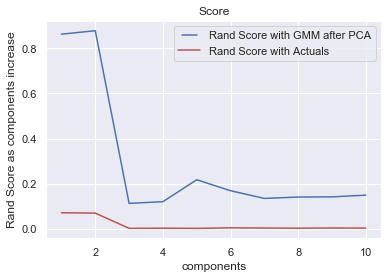

In [497]:
# See both line separately. Maybe even just 1 component is too many. 
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(comps, gmm_pca_r2, 'b', label="Rand Score with GMM after PCA")
line2, = plt.plot(comps, actual_gmm_pca_r2, 'r', label="Rand Score with Actuals")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Rand Score as components increase")
plt.xlabel("components")
plt.title("Score")
plt.show()

In [485]:
#ICA 
km_ica_r2=[]
actual_ica_r2=[]
from sklearn.decomposition import FastICA
components= range(1,21)
for i in components:
    transform_ICA = FastICA(n_components=i,tol=0.1,max_iter=10000)
    x_ICA2 = transform_ICA.fit_transform(xs2)
    pred_ica = km2_pca.fit_predict(x_ICA2)
    actual_ica_r2.append(adjusted_rand_score(pred_ica,y2))
    km_ica_r2.append(adjusted_rand_score(pred_ica,pred_y2))


C:\Users\Hashir\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Hashir\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


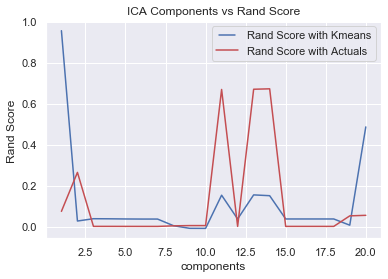

In [487]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(components, km_ica_r2, 'b', label="Rand Score with Kmeans")
line2, = plt.plot(components, actual_ica_r2, 'r', label="Rand Score with Actuals")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('ICA Components vs Rand Score')
plt.ylabel("Rand Score ")
plt.xlabel("components")
plt.show()

In [490]:
#randomized projections
km_rca_r2=[]
actual_rca_r2=[]
components= range(1,21)
for i in components:
    transform_RCA = GaussianRandomProjection(n_components=i)
    x_RCA2 = transform_RCA.fit_transform(xs2)
    pred_rca = km2_pca.fit_predict(x_RCA2)
    actual_rca_r2.append(adjusted_rand_score(pred_rca,y2))
    km_rca_r2.append(adjusted_rand_score(pred_rca,pred_y2))



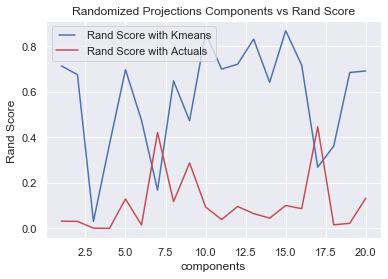

In [491]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(components, km_rca_r2, 'b', label="Rand Score with Kmeans")
line2, = plt.plot(components, actual_rca_r2, 'r', label="Rand Score with Actuals")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Randomized Projections Components vs Rand Score')
plt.ylabel("Rand Score ")
plt.xlabel("components")
plt.show()

In [502]:
#gmm with ica vs actuals and km vs actuals 
actual_gmm_ica_r2=[]
comps= range(1,21)
for i in comps:
    gmm_ica_y2 = gmm2.fit_predict(x_ICA2)
    actual_gmm_ica_r2.append(adjusted_rand_score(gmm_ica_y2,y2))

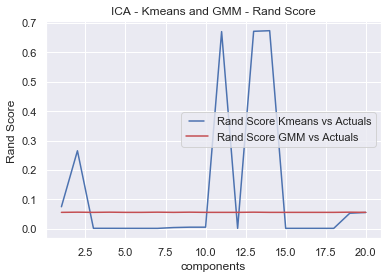

In [507]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(components,  actual_ica_r2, 'b', label="Rand Score Kmeans vs Actuals")
line2, = plt.plot(components, actual_gmm_ica_r2, 'r', label="Rand Score GMM vs Actuals")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('ICA - Kmeans and GMM - Rand Score')
plt.ylabel("Rand Score ")
plt.xlabel("components")
plt.show()

In [511]:
#for voice recognition the best nn was 3 layers with 10 nodes each #PCA 
mlp2 = MLPClassifier(hidden_layer_sizes=[10,10,10] ,max_iter=1000,random_state=500)
mlp2.fit(xs2_img, y2)
prediction2 = mlp2.predict(xs2_img)

In [528]:
#trying NN with filtered columns 
from sklearn.model_selection import train_test_split
train2,test2 = train_test_split(df2,test_size = 0.4, random_state=100)
columns = ['meanfun', 'IQR','sd']
x2_fil_tr = pd.DataFrame(train2, columns=columns)
x2_fil_ts = pd.DataFrame(test2, columns=columns)
y2_tr=train2['label']
y2_ts=test2['label']

In [533]:
def NNwork(mlp,x_tr,y_tr,x_ts,y_ts):
    mlp.fit(x_tr, y_tr)
    prediction= mlp.predict(x_ts)
    acc=accuracy_score(y_ts,prediction)
    conf=confusion_matrix(y_ts,prediction)
    return acc,prediction,conf

In [605]:
#ANN for GPU
mlp = MLPClassifier(hidden_layer_sizes=[6,6,6,6,6] ,max_iter=1000,random_state=500)
acc_fil, pred_fil,conf_fil=NNwork(mlp=mlp,x_tr=x_tr_fil,y_tr=y_tr,x_ts=x_ts_fil,y_ts=y_ts)

In [606]:
print(conf_fil, acc_fil)

[[52638   773]
 [ 3477 15592]] 0.9413631346578366


In [534]:
#ANN for Voice
mlp2 = MLPClassifier(hidden_layer_sizes=[10,10,10] ,max_iter=1000,random_state=500)
acc_fil2, pred_fil2,conf_fil2=NNwork(mlp=mlp2,x_tr=x2_fil_tr,y_tr=y2_tr,x_ts=x2_fil_ts,y_ts=y2_ts)

In [537]:
#filtered features neural network
print(conf_fil2, acc_fil2)

[[591  36]
 [ 14 627]] 0.9605678233438486


In [551]:
ICAconfusions=[]
ICAaccuracies=[]
for i in range(1,21):
    transform_ICA_i = FastICA(n_components=i,tol=0.1,max_iter=10000)
    x_ICA_tr2 = transform_ICA11.fit_transform(train2.iloc[:,0:20])
    x_ICA_ts2 = transform_ICA11.fit_transform(test2.iloc[:,0:20])
    acc_ICA2, pred_ICA2,conf_ICA2=NNwork(mlp=mlp2,x_tr=x_ICA_tr2,y_tr=y2_tr,x_ts=x_ICA_ts2,y_ts=y2_ts)
    ICAconfusions.append(conf_ICA2)
    ICAaccuracies.append(acc_ICA2)

In [549]:
#accuracy and conf mat for ica neural network voice with 13 components
#[[183 444]
 #[149 492]] 0.5323343848580442

Text(0.5, 1.0, 'ICA -Arificial Neural Network Accuracy')

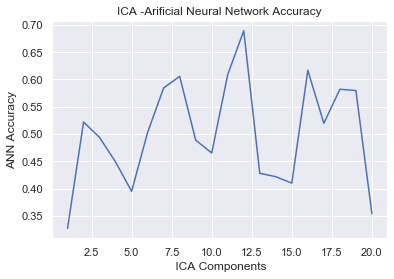

In [554]:
plt.plot(components,  ICAaccuracies, 'b', label="Rand Score Kmeans vs Actuals")
plt.xlabel(' ICA Components')
plt.ylabel('ANN Accuracy')
plt.title('ICA -Arificial Neural Network Accuracy')

In [648]:
#create data for voice recognition with clusters as features
newdic2={'KM Cluster':pred_y2,'GMM Cluster':gmm_y2,'label':y2}
newdata2=pd.DataFrame(newdic2)
newtrain2,newtest2 = train_test_split(newdata2,test_size = 0.4, random_state=100)
x2_new_tr = newtrain2.iloc[:,0:2]
x2_new_ts = newtest2.iloc[:,0:2]
new_y2_tr=newtrain2['label']
new_y2_ts=newtest2['label']
#NN on new data with clusters as features for y
acc_new2, pred_new2,conf_new2=NNwork(mlp=mlp2,x_tr=x2_new_tr,y_tr=new_y2_tr,x_ts=x2_new_ts,y_ts=new_y2_ts)
print(conf_new2,acc_new2,)

[[467 160]
 [297 344]] 0.639589905362776


In [655]:
#create data for GPU RUN TIME with clusters as features
newdic={'KM Cluster':pred_y,'GMM Cluster':gmm_y,'RunF_Binary':y_tr}
newdata=pd.DataFrame(newdic)
newtrain,newtest = train_test_split(newdata,test_size = 0.4, random_state=5000)
x_new_tr = newtrain.iloc[:,0:2]
x_new_ts = newtest.iloc[:,0:2]
new_y_tr=newtrain['RunF_Binary']
new_y_ts=newtest['RunF_Binary']
#NN on new data with clusters as features for y
acc_new, pred_new,conf_new=NNwork(mlp=mlp,x_tr=x_new_tr,y_tr=new_y_tr,x_ts=x_new_ts,y_ts=new_y_ts)
print(conf_new,acc_new)

[[50090     0]
 [17558     0]] 0.7404505676442763


In [633]:
newdata.head()

KM Cluster  GMM Cluster  RunF_Binary
16414            7            2            0
31358            5            3            0
197802           5            3            0
222705           6            7            1
207957           7            5            1

In [642]:
newtrain2.iloc[:,0:2]

KM Cluster  GMM Cluster
701            1            0
1856           1            0
462            1            0
415            1            0
3160           1            0
...          ...          ...
1930           1            0
79             1            1
1859           0            1
2840           0            1
1544           1            0

[1900 rows x 2 columns]

In [ ]:
mlpsingle = MLPClassifier(hidden_layer_sizes=[6,6,6,6,6] ,max_iter=1000,random_state=500)